# Pytorch Workflow

Lets explore an example Pytorch end-to-end workflow

In [1]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model'}

In [2]:
import torch
from torch import nn # nn contains all of pytorch's building blocks for neural network
import matplotlib.pyplot as plt
import numpy as np

# check pytorch version
print(torch.__version__)

2.2.1+cu121


## 1. Data Preparing and Loading

Data can be almost anything.... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:

1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, lets create some *known* data using the linear regression formula

We will use a linear regression formula to make a straight line with known **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1).unsqueeze(dim=1)
y = weight * X + bias

print(X.shape, "\n\n", X[:10], "\n\n", y[:10])

torch.Size([50, 1, 1]) 

 tensor([[[0.0000]],

        [[0.0200]],

        [[0.0400]],

        [[0.0600]],

        [[0.0800]],

        [[0.1000]],

        [[0.1200]],

        [[0.1400]],

        [[0.1600]],

        [[0.1800]]]) 

 tensor([[[0.3000]],

        [[0.3140]],

        [[0.3280]],

        [[0.3420]],

        [[0.3560]],

        [[0.3700]],

        [[0.3840]],

        [[0.3980]],

        [[0.4120]],

        [[0.4260]]])


In [4]:
 len(X), len(y)

(50, 50)

### Splitting data into training and test sets (One of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [6]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
  Plots training data, test data and compares predictions
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  # Are there predictions
  if predictions is not None:
    # plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  plt.legend(prop={"size": 14})

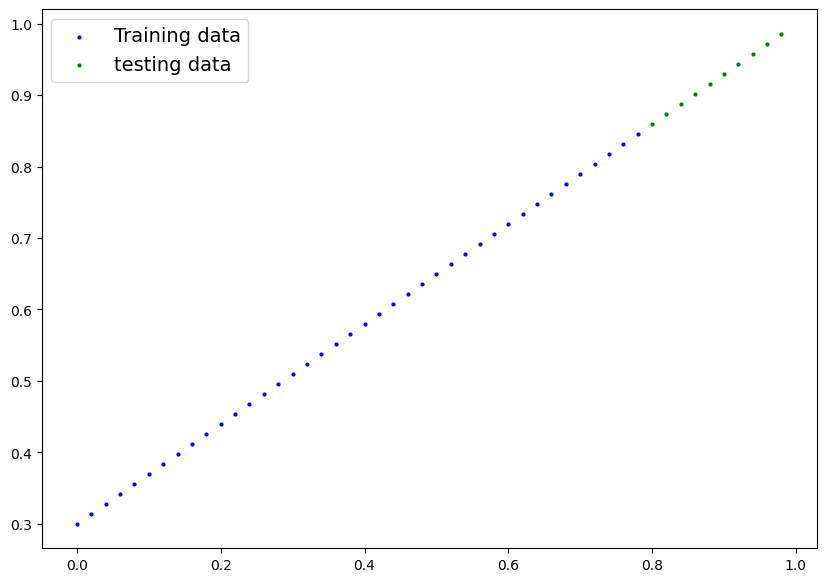

In [7]:
plot_predictions()

## 2. Build Model

Our First Pytorch model!

This is very exciting... let's do it

What our model does:
1. Start with random values (weight and bias)
2. Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias vales we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [8]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # This is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of building for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all the neural network, if you sub class it, you should overwrite the forward()
* torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation
* torch.utils.data.Dataset  - Represent a map between key (label) and sample (features) pairs of your data. Such as integers and their associated labels.
* torch.utils.data.DataLoader - Creates a Python iterable over a torch Dataset (allows you to iterate over your data)

###### Link for the pytorch cheatsheet: https://pytorch.org/tutorials/beginner/ptcheat.html

#### Checking the contents of the Pytorch Model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using .parameters()

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
 #List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well predicts `y_test` based on `X_test`.

When awe pass data through ouor model, its going to run it through the forward() method.

In [11]:
X_test, print("\n"), y_test

(tensor([[[0.8000]],
 
         [[0.8200]],
 
         [[0.8400]],
 
         [[0.8600]],
 
         [[0.8800]],
 
         [[0.9000]],
 
         [[0.9200]],
 
         [[0.9400]],
 
         [[0.9600]],
 
         [[0.9800]]]),
 None,
 tensor([[[0.8600]],
 
         [[0.8740]],
 
         [[0.8880]],
 
         [[0.9020]],
 
         [[0.9160]],
 
         [[0.9300]],
 
         [[0.9440]],
 
         [[0.9580]],
 
         [[0.9720]],
 
         [[0.9860]]]))

In [12]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also do something similar  using `no_grad()` but still inference_model considered
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[[0.3982]],

        [[0.4049]],

        [[0.4116]],

        [[0.4184]],

        [[0.4251]],

        [[0.4318]],

        [[0.4386]],

        [[0.4453]],

        [[0.4520]],

        [[0.4588]]])

In [13]:
y_test

tensor([[[0.8600]],

        [[0.8740]],

        [[0.8880]],

        [[0.9020]],

        [[0.9160]],

        [[0.9300]],

        [[0.9440]],

        [[0.9580]],

        [[0.9720]],

        [[0.9860]]])

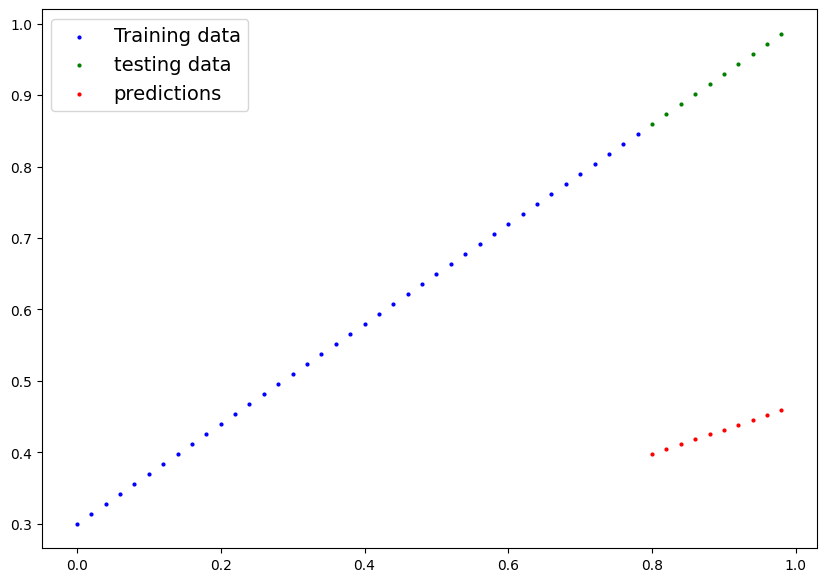

In [14]:
plot_predictions(predictions=y_preds)

## 3. Train Model
The whole idea of training is for a model to move from some * unkown parameters, may be random to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models prediction are is to use a loss function.

* Note: Loss function may also be called Cost function or criterion in different areas. For our case, we'are goinf to refer to it as loss function.

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias) to improve the loss function.

And specifically for Pytorch, we need:
  * A training loop
  * A testing loop

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimiser (Stochastic Gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.01) # lr = learning rate

## Building a training loop (and a testing loop) in pytorch

A couple of things we need in a training loop
0. Loop through the data
1. Forward pass (this involves data moving through our models `forward()` functions) to make prediction on data - also called forward propagation.
2. Calculate the loss (compare the forward pas predicions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the netwrok to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [18]:
## An epoch is one loop through data (this is a hyperparamter because we've set it ourselves)
epochs = 2000

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTroch sets all paramters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  model_0.eval() # turn off the gradient tracking and a couple more things behind the scenes
  with torch.inference_mode():
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Ep

In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [21]:
# Prediction
with torch.inference_mode():
  y_preds = model_0(X_test)

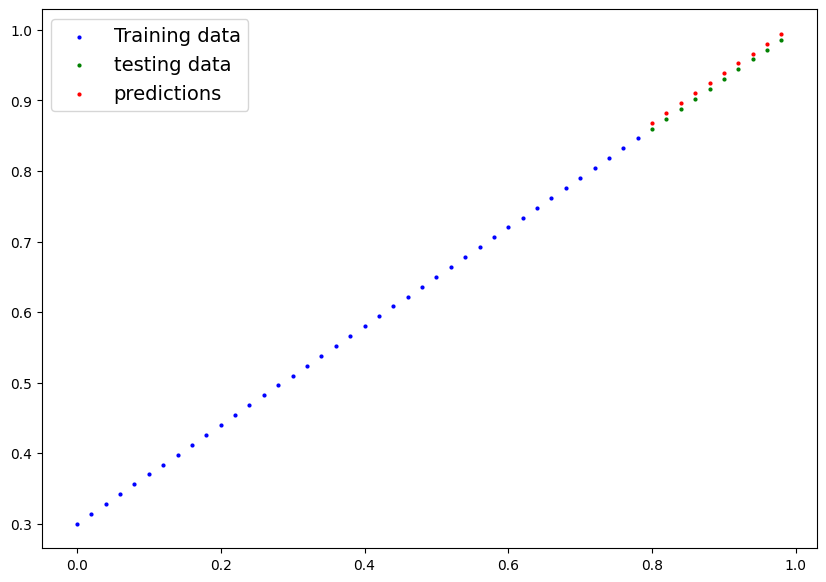

In [22]:
plot_predictions(predictions=y_preds)

In [23]:
epoch_count = np.array(epoch_count)
loss_values = torch.tensor(loss_values).cpu().numpy()

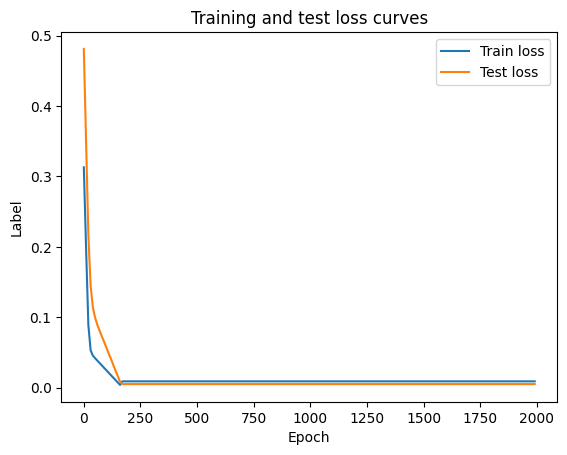

In [24]:
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Label")
plt.xlabel("Epoch")
plt.legend()

## Saving a model in pytorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allow you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to loada a model's saved state dictionary

In [25]:
# Saving our Pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [26]:
# lOADING THE MODEL
model_0 = LinearRegressionModel()
model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [27]:
model_0.eval()

LinearRegressionModel()

In [28]:
y_pred = torch.tensor(model_0(X_test)).numpy()

<ipython-input-28-930917494ba3>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = torch.tensor(model_0(X_test)).numpy()


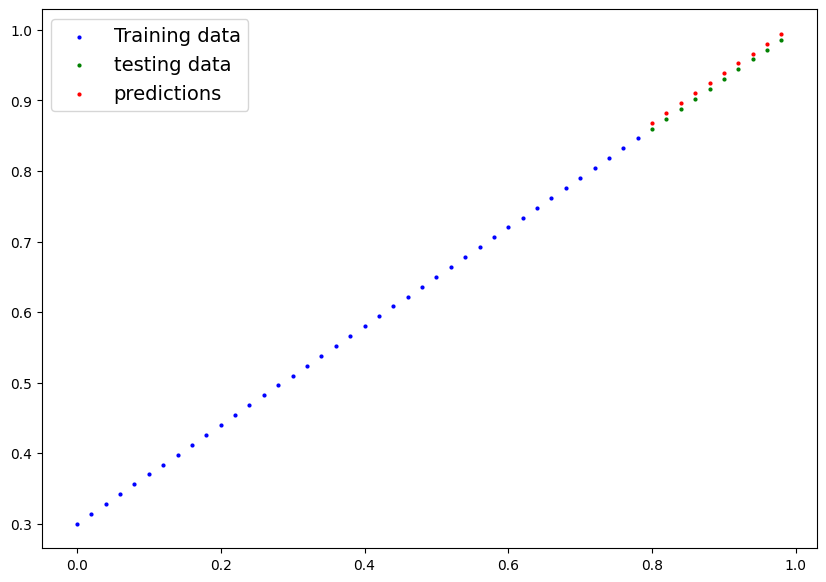

In [29]:
plot_predictions(predictions=y_pred)

In [30]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])